In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_columns", None)

## EDA Age Rating

#### Goals

- Get descriptive statistics for age ratings for each streaming service.

- Plot data.

- Compare findings.

-----

### 1. Hulu
#### i. Import data

In [2]:
hulu = pd.read_pickle("Data_Hulu_Disney/hulu_final_clean.pkl")

In [3]:
hulu.head()

,show,year,age,imdb_rating,imdb_id,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres
0,Rick and Morty,2013,18.0,9.2,tt2861424,tvSeries,Rick and Morty,Rick and Morty,2013.0,2013.0,23.0,"Adventure,Animation,Comedy"
1,Fargo,2014,18.0,8.9,tt2802850,tvSeries,Fargo,Fargo,2014.0,2014.0,53.0,"Crime,Drama,Thriller"
2,Vikings,2013,18.0,8.5,tt2306299,tvSeries,Vikings,Vikings,2013.0,2013.0,44.0,"Action,Adventure,Drama"
3,Brooklyn Nine-Nine,2013,16.0,8.4,tt2467372,tvSeries,Brooklyn Nine-Nine,Brooklyn Nine-Nine,2013.0,2013.0,22.0,"Comedy,Crime"
4,Community,2009,7.0,8.5,tt1439629,tvSeries,Community,Community,2009.0,2009.0,22.0,Comedy


In [4]:
hulu["age"].isna().sum()

332

In [5]:
1 - (hulu["age"].isna().sum() / len(hulu))

0.7735334242837654

**NOTE : We have 332 null values for the ratings column, meaning that we are using just 77% of the values for this analysis.**


In [6]:
hulu = hulu[~hulu["age"].isna()]

#### ii. Descriptive Statistics

In [7]:
hulu["age"].describe()

count    1134.000000
mean       11.970018
std         6.072450
min         0.000000
25%         7.000000
50%        16.000000
75%        16.000000
max        18.000000
Name: age, dtype: float64

From the descriptive statistics we can see the following:

- One quarter of the tv shows are for 7 years or younger.
- Half of the tv shows are for 16 years or older.

#### iii. Plotting

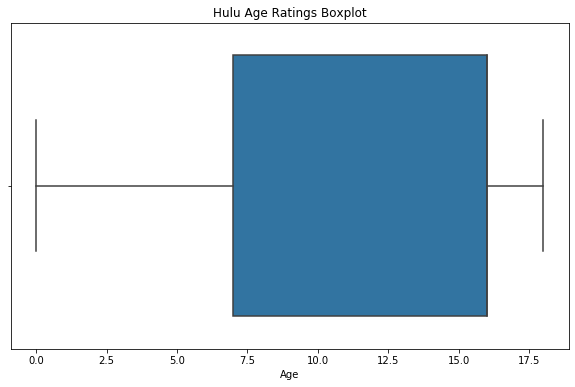

In [8]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(hulu["age"])
ax.set_title("Hulu Age Ratings Boxplot")
ax.set_xlabel("Age");

From the box plot we can clearly see how most of the tv shows are distributed from 7 years or older to 16 years or older.

We will create a new column specifying the audience:

- 0-7 years: Children
- 7-16 years: Teen
- 18 years: Adult

In [9]:
hulu["audience"] = np.where(hulu["age"] <= 12, "Children", np.where(hulu["age"] < 18, "Teen", "Adult"))

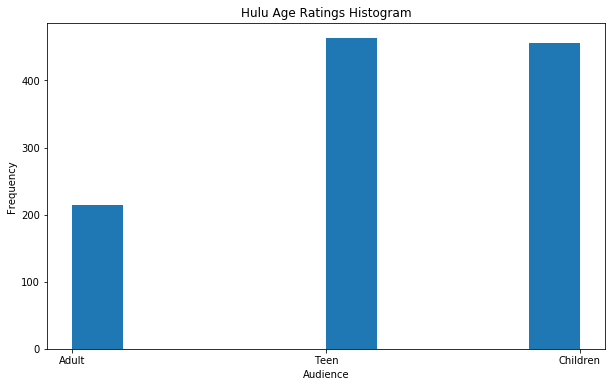

In [10]:
fig, ax = plt.subplots(figsize=(10,6))

plt.hist(hulu["audience"])
ax.set_title("Hulu Age Ratings Histogram")
ax.set_xlabel("Audience")
ax.set_ylabel("Frequency");

From the histogram above, we can see, as stated before, that most of the tv shows are for Teens and Children, having aroung 480 TV shows each. Adult coming at last with arounf 210 TV shows.

-----

### 2. Disney+
#### i. Import data

In [11]:
disney = pd.read_pickle("Data_Hulu_Disney/disney_final_clean.pkl")

In [12]:
disney.head()

,show,year,age,imdb_rating,imdb_id,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres
0,The Mandalorian,2019,7.0,8.7,tt8111088,tvSeries,The Mandalorian,The Mandalorian,2019.0,2019.0,30.0,"Action,Adventure,Sci-Fi"
1,The Simpsons,1989,7.0,8.7,tt0096697,tvSeries,The Simpsons,The Simpsons,1989.0,1989.0,22.0,"Animation,Comedy"
2,Gravity Falls,2012,7.0,8.9,tt1865718,tvSeries,Gravity Falls,Gravity Falls,2012.0,2012.0,23.0,"Action,Adventure,Animation"
3,Star Wars: The Clone Wars,2008,7.0,8.2,tt0458290,tvSeries,Star Wars: The Clone Wars,Star Wars: The Clone Wars,2008.0,2008.0,23.0,"Action,Adventure,Animation"
4,DuckTales,2017,7.0,8.2,tt5531466,tvSeries,DuckTales,DuckTales,2017.0,2017.0,21.0,"Action,Adventure,Animation"


In [13]:
disney["age"].isna().sum()

20

In [14]:
1 - (disney["age"].isna().sum() / len(disney))

0.868421052631579

**NOTE : We have 20 null values for the ratings column, meaning that we are using just 86% of the values for this analysis.**

In [15]:
disney = disney[~disney["age"].isna()]

#### ii. Descriptive Statistics

In [16]:
disney["age"].describe()

count    132.000000
mean       3.265152
std        3.806102
min        0.000000
25%        0.000000
50%        0.000000
75%        7.000000
max       16.000000
Name: age, dtype: float64

From the descriptive statistics we can see the following:

- 75% of the tv shows are for 7 years or younger.
- 25% of the tv shows are for 16 years or older.

#### iii. Plotting

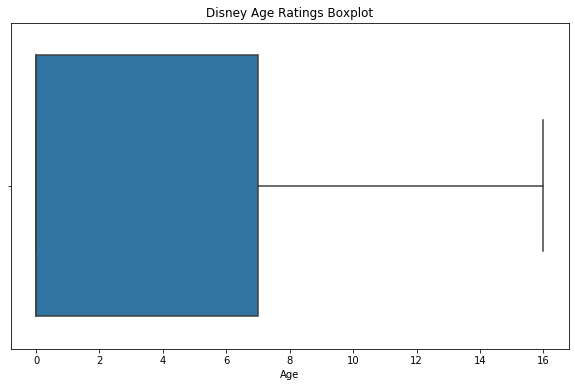

In [17]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(disney["age"])
ax.set_title("Disney Age Ratings Boxplot")
ax.set_xlabel("Age");

From the box plot we can see how most of the tv shows are for 7 years or younger, making ita heavily skewed data.

In [18]:
disney["audience"] = np.where(disney["age"] <= 12, "Children", np.where(disney["age"] < 18, "Teen", "Adult"))

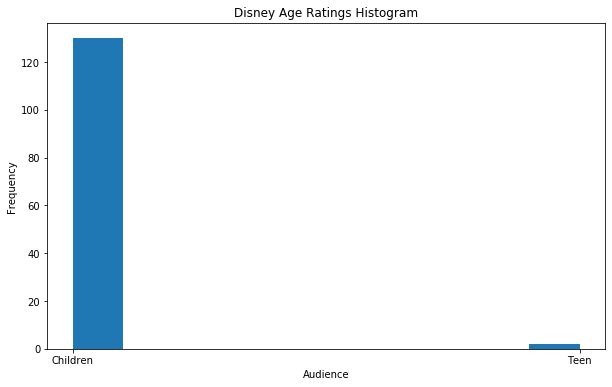

In [19]:
fig, ax = plt.subplots(figsize=(10,6))

plt.hist(disney["audience"])
ax.set_title("Disney Age Ratings Histogram")
ax.set_xlabel("Audience")
ax.set_ylabel("Frequency");

As stated before, we can see that most of the tv shows are for Children. Around 5 TV shows are for teens and we have no shows just for adults.


### 3. Comparison with other streaming services

#### i. Import data

In [20]:
age_ratings = pd.read_pickle("../Data/age_ratings.pkl")

In [21]:
age_ratings

,audience,frequency,normalize,streaming_service
0,Adult,340,30.69,Netflix
1,Children,403,36.37,Netflix
2,Teen,365,32.94,Netflix
3,Adult,162,23.82,Amazon
4,Children,332,48.82,Amazon
5,Teen,186,27.35,Amazon
6,Adult,107,75.35,HBO
7,Children,14,9.86,HBO
8,Teen,21,14.79,HBO


#### ii. Normalize data for Hulu and Disney+

In [22]:
hulu_age = (hulu.groupby("audience")
               .agg({"show":"count"})
               .reset_index()
               .rename(columns={"show":"frequency"}))

hulu_age["normalize"] = round(((hulu_age["frequency"] / hulu_age["frequency"].sum()) * 100), 2)

hulu_age["streaming_service"] = "Hulu"

In [23]:
disney_age = (disney.groupby("audience")
               .agg({"show":"count"})
               .reset_index()
               .rename(columns={"show":"frequency"}))

disney_age["normalize"] = round(((disney_age["frequency"] / disney_age["frequency"].sum()) * 100), 2)

disney_age["streaming_service"] = "Disney+"

#### iii. Combine data frames

In [24]:
age_ratings = age_ratings.append(hulu_age).append(disney_age).reset_index(drop=True)

In [25]:
age_ratings

,audience,frequency,normalize,streaming_service
0,Adult,340,30.69,Netflix
1,Children,403,36.37,Netflix
2,Teen,365,32.94,Netflix
3,Adult,162,23.82,Amazon
4,Children,332,48.82,Amazon
5,Teen,186,27.35,Amazon
6,Adult,107,75.35,HBO
7,Children,14,9.86,HBO
8,Teen,21,14.79,HBO
9,Adult,215,18.96,Hulu


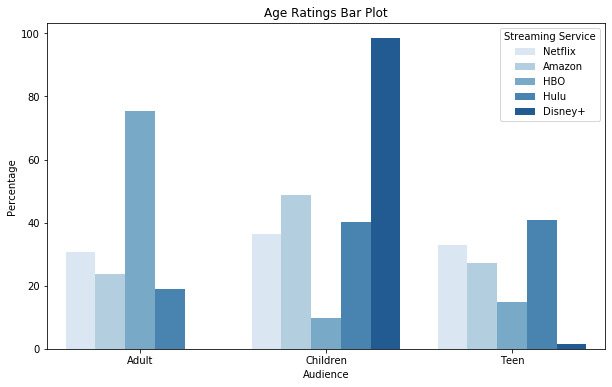

In [26]:
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(x=age_ratings["audience"]
            , y=age_ratings["normalize"]
            , hue=age_ratings["streaming_service"]
            , palette="Blues"
           , ci=None)

ax.set_xlabel("Audience")
ax.set_ylabel("Percentage")
ax.set_title("Age Ratings Bar Plot")

plt.legend(title="Streaming Service");

From the histogram above we can conclude the following:

- Disney+ stands out with the most TV shows for children.
- HBO stands out with the most TV shows for adults.
- Netflix, Amazon, and Hulu seem to follow the same distributions, Netflix having more TV shows for adults, Hulu having more TV shows for teens, and Amazon more for Children.